# Mohammad Tayyab Alam - 24157 - Assignment 3 

# Data Preprocessing

## Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'HSBC_ST138D-XLS-ENG.xlsx'
df = pd.read_excel(file_path, sheet_name='Synthetic Data')

# one hot encoding age to create new insights into life stage
df = pd.get_dummies(df, columns=['AGE'], prefix='AGE')
age_columns = [col for col in df.columns if col.startswith('AGE_')]
df[age_columns] = df[age_columns].astype(int)


## Feature Engineering
- d2i (Debt to Income) is ratio of income and TRB
- dig_eng_score is sum of all digital products
- product_diversity = how many different types of products you have
- tech savvy = sum of usage of online services where all are active.
- HNWI  is when the user uses the structured products and bonds.

In [2]:
df['INCOME'] = df['INCOME'].replace(0, np.nan)
df['D2I'] = df['TRB'] / df['INCOME']
df['DIG_ENG_SCORE'] = df['DIG_ACTIVE'] + df['FX_TRANS'] + df['PAYME']
product_cols = ['CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']
df['PRODUCT_DIVERSITY'] = df[product_cols].sum(axis=1)
df['TECH_SAVVY'] = ((df['DIG_ACTIVE'] == 1) & (df['FX_TRANS'] == 1) & (df['PAYME'] == 1)).astype(int)
df['HNWI'] = ((df['MT'] == 1) & (df['SP'] == 1) & (df['BD'] == 1)).astype(int)

df = df.fillna(0)  # Fill missing values with 0


In [3]:
df

,INCOME,TRB,DIG_ACTIVE,FX_TRANS,PAYME,CC,LN,MT,TD,SC,...,BD,MPF,AGE_18-24,AGE_25-29,AGE_30-34,D2I,DIG_ENG_SCORE,PRODUCT_DIVERSITY,TECH_SAVVY,HNWI
0,9012.126323,62051.474999,0,0,1,0,0,0,0,0,...,0,1,0,0,1,6.885331,1,1,0,0
1,44108.030639,4.053788,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0.000092,1,1,0,0
2,45782.412638,291995.998395,1,0,0,0,0,0,0,0,...,0,0,0,1,0,6.377908,1,0,0,0
3,26525.406385,81.503869,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0.003073,1,1,0,0
4,20671.511249,1447.011647,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0.070000,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,98811.041214,322954.777829,1,0,1,1,0,0,0,1,...,1,0,0,0,1,3.268408,2,3,0,0
49996,91406.003687,72851.739482,1,0,1,0,0,0,0,0,...,0,1,0,0,1,0.797013,2,1,0,0
49997,92462.010757,564988.764715,0,0,1,1,0,1,0,0,...,1,0,0,0,1,6.110496,1,3,0,0
49998,91213.028165,150780.474379,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1.653059,1,2,0,0


# EDA: Overview of the dataset

Dataset Overview:
             INCOME           TRB    DIG_ACTIVE      FX_TRANS        PAYME  \
count  5.000000e+04  5.000000e+04  50000.000000  50000.000000  50000.00000   
mean   3.123016e+04  1.627904e+05      0.818160      0.237360      0.66570   
std    2.589240e+04  3.917090e+05      0.385716      0.425469      0.47175   
min   -1.966988e+04  0.000000e+00      0.000000      0.000000      0.00000   
25%    1.855612e+04  4.681008e+03      1.000000      0.000000      0.00000   
50%    2.710790e+04  3.790828e+04      1.000000      0.000000      1.00000   
75%    3.986781e+04  1.703579e+05      1.000000      0.000000      1.00000   
max    1.380715e+06  2.282008e+07      1.000000      1.000000      1.00000   

                CC            LN            MT            TD            SC  \
count  50000.00000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.48838      0.076440      0.077520      0.093200      0.096360   
std        0.49987      0.265703      0.26741

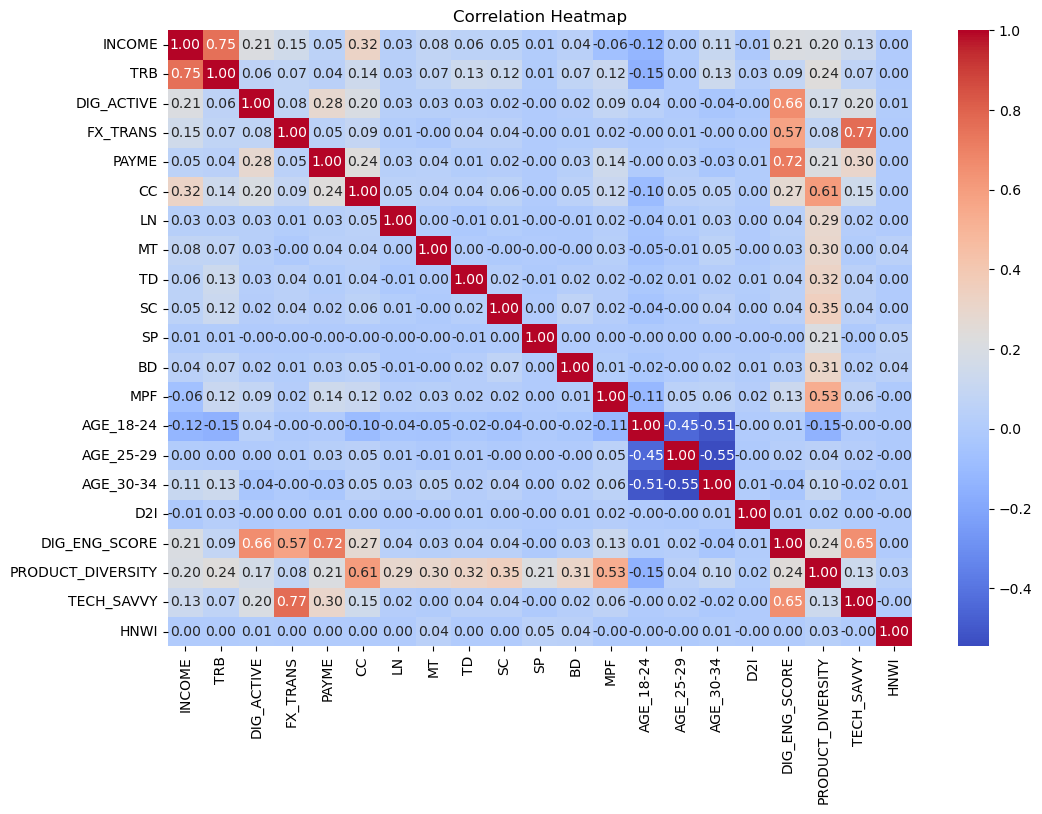

C:\Users\Tayyab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


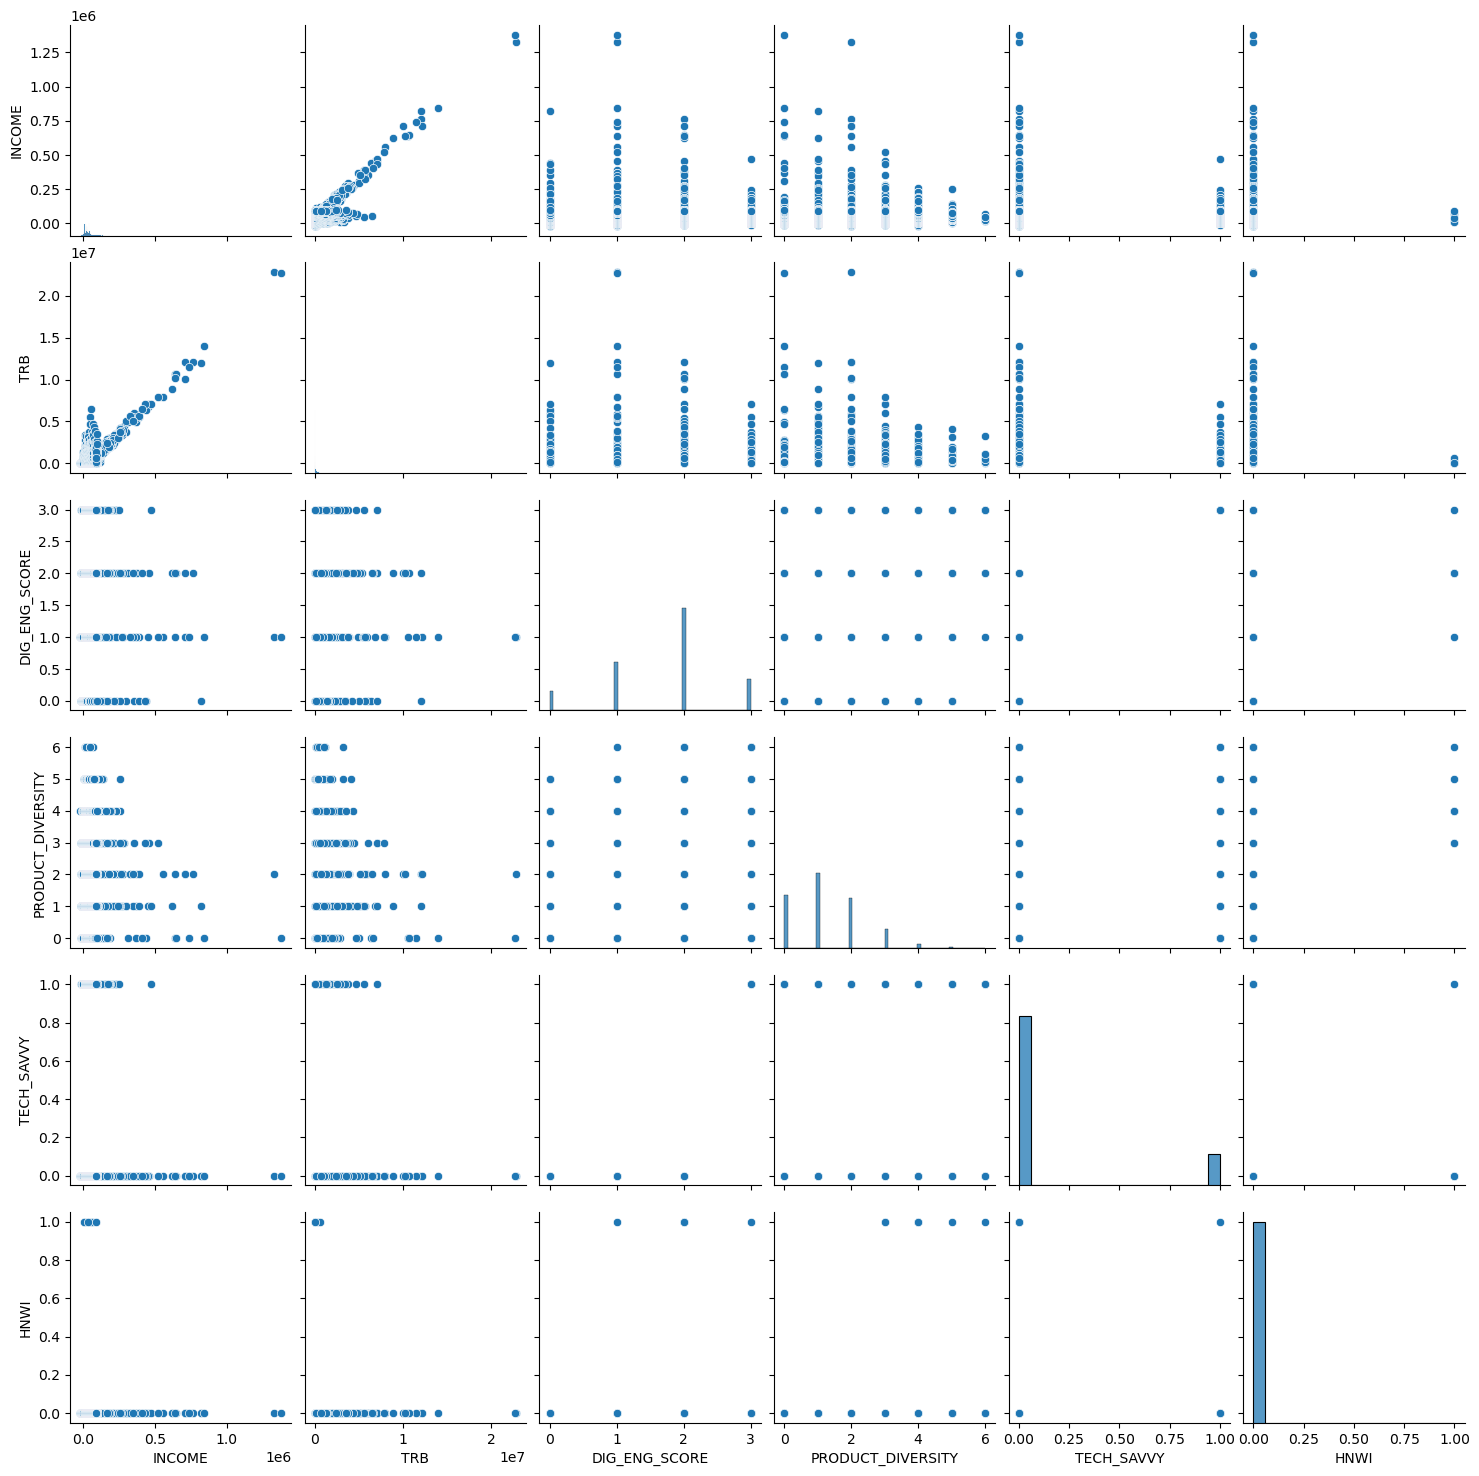

In [4]:
print("Dataset Overview:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

#plotting
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

#key features
sns.pairplot(df[['INCOME', 'TRB', 'DIG_ENG_SCORE', 'PRODUCT_DIVERSITY', 'TECH_SAVVY', 'HNWI']])
plt.show()


### **Data Analysis Summary with Correlation Insights:**

- **Income and Transaction Behavior**:
  - **INCOME**: Average of **HKD 31,230**, with extreme outliers (min = **-HKD 19,669**, max = **HKD 1,380,715**), suggesting significant income disparities.
  - **TRB (Total Relationship Balance)**: Average **HKD 162,790**, with high variation (min = **0**, max = **HKD 22,820,080**), indicating varying customer engagement with banking products.
  - **Correlation**: **INCOME** and **TRB** have a strong positive correlation (**0.75**), indicating customers with higher income tend to have higher transaction-related behavior.

- **Digital Engagement**:
  - **DIG_ACTIVE**: **81.8%** of customers are digitally active.
  - **FX_TRANS**: **23.7%** engaged in international transactions, while **PAYME** (digital payments) is used by **66.5%**.
  - **Correlation**: **DIG_ACTIVE** and **PAYME** show a moderate positive correlation (**0.57**), indicating that active digital users are likely to use PayMe.

- **Debt and Financial Engagement**:
  - **D2I (Debt-to-Income)**: High average of **7.15**, indicating many customers are highly leveraged.
  - **Correlation**: **D2I** and **TRB** are moderately correlated (**0.21**), indicating that customers with higher debt also tend to have higher transaction balances.

- **Product Engagement**:
  - **PRODUCT_DIVERSITY**: Average of **1.24**, with some customers holding up to **6 products**, reflecting varied levels of product engagement.
  - **Correlation**: **PRODUCT_DIVERSITY** is highly correlated with **TRB** (**0.61**), showing that customers with higher product engagement tend to have higher balances.

- **Tech Savviness and HNWI**:
  - **TECH_SAVVY**: **15.4%** are tech-savvy, while **HNWI** represents only **0.014%** of customers.
  - **Correlation**: **TECH_SAVVY** and **PRODUCT_DIVERSITY** have a moderate positive correlation (**0.65**), indicating that tech-savvy customers are more likely to use a diverse range of products.


# Defining features to use with k means 

In [5]:
# Defining the features that k means will work
features_base = ['INCOME', 'TRB', 'D2I', 'DIG_ENG_SCORE']
features_age = ['D2I', 'DIG_ENG_SCORE',  'TECH_SAVVY', 'HNWI'] + age_columns
features_all = features_age + ['DIG_ACTIVE', 'FX_TRANS', 'PAYME'] + product_cols
raw_features = ['AGE', 'INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS', 'PAYME', 
                'CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']

# Defining function for outlier removal

In [6]:
# outlier removal function
def remove_outliers(dataframe, columns):
    df_no_outliers = dataframe.copy()
    for col in columns:
        Q1 = df_no_outliers[col].quantile(0.25)
        Q3 = df_no_outliers[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]
    return df_no_outliers


# Using the elbow method (Note that standardizing is done in this step)
## The best k is 5 as elbow there and it is used.

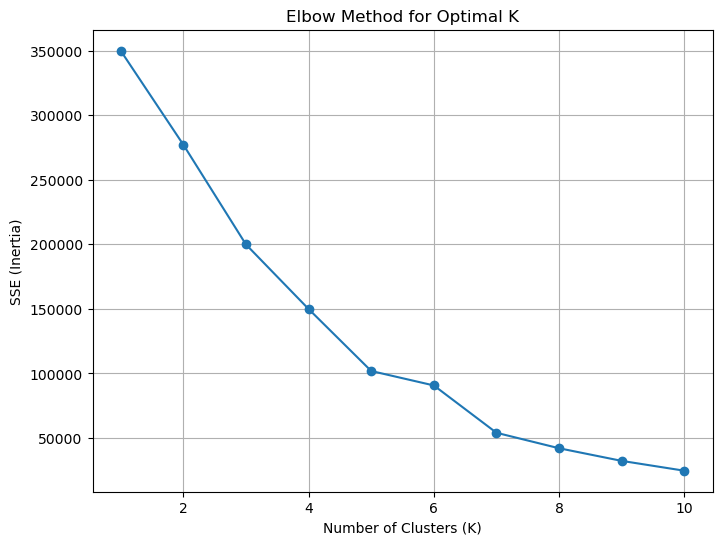

In [7]:
# creating elbow plot 
features = features_age  

X = df[features]

# Standardizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method: Calculate SSE for different values of K
sse = []  
K_range = range(1, 11)  # Range of K to evaluate (from 1 to 10)

# Calculate SSE for each K
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the SSE

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

# Saving clusters to df

In [8]:
# Based on elbow plot, choose K , save the cluster markings to the dataframe 
kmeans = KMeans(n_clusters=5, random_state=42)
df['CLUSTER'] = kmeans.fit_predict(X_scaled)

# BEST K = 5

## Running iterations through k< n , k>n  and k = n where n = 2, 6, 5 respectively

### Code to iterate through different features and variation of outliers to determine if outlier removal best or not and which features to use

In [9]:

# standardizer
scaler = StandardScaler()

# 1. For features_base with outlier removal
df_no_outliers_base = remove_outliers(df, features_base)
X_scaled_base = scaler.fit_transform(df_no_outliers_base[features_base])
kmeans_base = KMeans(n_clusters=2, random_state=42)
labels_base = kmeans_base.fit_predict(X_scaled_base)
sil_score_base = silhouette_score(X_scaled_base, labels_base)
inertia_base = kmeans_base.inertia_
print(f"Silhouette Score (features_base without outliers): {sil_score_base:.3f}")
print(f"Inertia (features_base without outliers): {inertia_base:.3f}")

# 2. For features_base without outlier removal
X_scaled_base_raw = scaler.fit_transform(df[features_base])
kmeans_base_raw = KMeans(n_clusters=2, random_state=42)
labels_base_raw = kmeans_base_raw.fit_predict(X_scaled_base_raw)
sil_score_base_raw = silhouette_score(X_scaled_base_raw, labels_base_raw)
inertia_base_raw = kmeans_base_raw.inertia_
print(f"Silhouette Score (features_base with outliers): {sil_score_base_raw:.3f}")
print(f"Inertia (features_base with outliers): {inertia_base_raw:.3f}")

# 3. For features_age with outlier removal
df_no_outliers_age = remove_outliers(df, features_age)
X_scaled_age = scaler.fit_transform(df_no_outliers_age[features_age])
kmeans_age = KMeans(n_clusters=2, random_state=42)
labels_age = kmeans_age.fit_predict(X_scaled_age)
sil_score_age = silhouette_score(X_scaled_age, labels_age)
inertia_age = kmeans_age.inertia_
print(f"Silhouette Score (features_age without outliers): {sil_score_age:.3f}")
print(f"Inertia (features_age without outliers): {inertia_age:.3f}")

# 4. For features_age without outlier removal
X_scaled_age_raw = scaler.fit_transform(df[features_age])
kmeans_age_raw = KMeans(n_clusters=2, random_state=42)
labels_age_raw = kmeans_age_raw.fit_predict(X_scaled_age_raw)
sil_score_age_raw = silhouette_score(X_scaled_age_raw, labels_age_raw)
inertia_age_raw = kmeans_age_raw.inertia_
print(f"Silhouette Score (features_age with outliers): {sil_score_age_raw:.3f}")
print(f"Inertia (features_age with outliers): {inertia_age_raw:.3f}")

# 5. For features_all with outlier removal
df_no_outliers_all = remove_outliers(df, features_all)
X_scaled_all = scaler.fit_transform(df_no_outliers_all[features_all])
kmeans_all = KMeans(n_clusters=2, random_state=42)
labels_all = kmeans_all.fit_predict(X_scaled_all)
sil_score_all = silhouette_score(X_scaled_all, labels_all)
inertia_all = kmeans_all.inertia_
print(f"Silhouette Score (features_all without outliers): {sil_score_all:.3f}")
print(f"Inertia (features_all without outliers): {inertia_all:.3f}")

# 6. For features_all without outlier removal
X_scaled_all_raw = scaler.fit_transform(df[features_all])
kmeans_all_raw = KMeans(n_clusters=2, random_state=42)
labels_all_raw = kmeans_all_raw.fit_predict(X_scaled_all_raw)
sil_score_all_raw = silhouette_score(X_scaled_all_raw, labels_all_raw)
inertia_all_raw = kmeans_all_raw.inertia_
print(f"Silhouette Score (features_all with outliers): {sil_score_all_raw:.3f}")
print(f"Inertia (features_all with outliers): {inertia_all_raw:.3f}")


Silhouette Score (features_base without outliers): 0.413
Inertia (features_base without outliers): 100134.657
Silhouette Score (features_base with outliers): 0.296
Inertia (features_base with outliers): 165112.983
Silhouette Score (features_age without outliers): 0.364
Inertia (features_age without outliers): 135369.483
Silhouette Score (features_age with outliers): 0.392
Inertia (features_age with outliers): 277196.587
Silhouette Score (features_all without outliers): 0.227
Inertia (features_all without outliers): 117801.339
Silhouette Score (features_all with outliers): 0.184
Inertia (features_all with outliers): 849061.339


In [10]:


# standardizer
scaler = StandardScaler()

# 1. For features_base with outlier removal
df_no_outliers_base = remove_outliers(df, features_base)
X_scaled_base = scaler.fit_transform(df_no_outliers_base[features_base])
kmeans_base = KMeans(n_clusters=3, random_state=42)
labels_base = kmeans_base.fit_predict(X_scaled_base)
sil_score_base = silhouette_score(X_scaled_base, labels_base)
inertia_base = kmeans_base.inertia_
print(f"Silhouette Score (features_base without outliers): {sil_score_base:.3f}")
print(f"Inertia (features_base without outliers): {inertia_base:.3f}")

# 2. For features_base without outlier removal
X_scaled_base_raw = scaler.fit_transform(df[features_base])
kmeans_base_raw = KMeans(n_clusters=3, random_state=42)
labels_base_raw = kmeans_base_raw.fit_predict(X_scaled_base_raw)
sil_score_base_raw = silhouette_score(X_scaled_base_raw, labels_base_raw)
inertia_base_raw = kmeans_base_raw.inertia_
print(f"Silhouette Score (features_base with outliers): {sil_score_base_raw:.3f}")
print(f"Inertia (features_base with outliers): {inertia_base_raw:.3f}")

# 3. For features_age with outlier removal
df_no_outliers_age = remove_outliers(df, features_age)
X_scaled_age = scaler.fit_transform(df_no_outliers_age[features_age])
kmeans_age = KMeans(n_clusters=3, random_state=42)
labels_age = kmeans_age.fit_predict(X_scaled_age)
sil_score_age = silhouette_score(X_scaled_age, labels_age)
inertia_age = kmeans_age.inertia_
print(f"Silhouette Score (features_age without outliers): {sil_score_age:.3f}")
print(f"Inertia (features_age without outliers): {inertia_age:.3f}")

# 4. For features_age without outlier removal
X_scaled_age_raw = scaler.fit_transform(df[features_age])
kmeans_age_raw = KMeans(n_clusters=3, random_state=42)
labels_age_raw = kmeans_age_raw.fit_predict(X_scaled_age_raw)
sil_score_age_raw = silhouette_score(X_scaled_age_raw, labels_age_raw)
inertia_age_raw = kmeans_age_raw.inertia_
print(f"Silhouette Score (features_age with outliers): {sil_score_age_raw:.3f}")
print(f"Inertia (features_age with outliers): {inertia_age_raw:.3f}")

# 5. For features_all with outlier removal
df_no_outliers_all = remove_outliers(df, features_all)
X_scaled_all = scaler.fit_transform(df_no_outliers_all[features_all])
kmeans_all = KMeans(n_clusters=3, random_state=42)
labels_all = kmeans_all.fit_predict(X_scaled_all)
sil_score_all = silhouette_score(X_scaled_all, labels_all)
inertia_all = kmeans_all.inertia_
print(f"Silhouette Score (features_all without outliers): {sil_score_all:.3f}")
print(f"Inertia (features_all without outliers): {inertia_all:.3f}")

# 6. For features_all without outlier removal
X_scaled_all_raw = scaler.fit_transform(df[features_all])
kmeans_all_raw = KMeans(n_clusters=3, random_state=42)
labels_all_raw = kmeans_all_raw.fit_predict(X_scaled_all_raw)
sil_score_all_raw = silhouette_score(X_scaled_all_raw, labels_all_raw)
inertia_all_raw = kmeans_all_raw.inertia_
print(f"Silhouette Score (features_all with outliers): {sil_score_all_raw:.3f}")
print(f"Inertia (features_all with outliers): {inertia_all_raw:.3f}")


Silhouette Score (features_base without outliers): 0.330
Inertia (features_base without outliers): 73648.521
Silhouette Score (features_base with outliers): 0.453
Inertia (features_base with outliers): 129804.059
Silhouette Score (features_age without outliers): 0.536
Inertia (features_age without outliers): 77572.574
Silhouette Score (features_age with outliers): 0.590
Inertia (features_age with outliers): 199909.107
Silhouette Score (features_all without outliers): 0.330
Inertia (features_all without outliers): 90025.146
Silhouette Score (features_all with outliers): 0.121
Inertia (features_all with outliers): 770590.077


In [11]:

# standardizer
scaler = StandardScaler()

# 1. For features_base with outlier removal
df_no_outliers_base = remove_outliers(df, features_base)
X_scaled_base = scaler.fit_transform(df_no_outliers_base[features_base])
kmeans_base = KMeans(n_clusters=6, random_state=42)
labels_base = kmeans_base.fit_predict(X_scaled_base)
sil_score_base = silhouette_score(X_scaled_base, labels_base)
inertia_base = kmeans_base.inertia_
print(f"Silhouette Score (features_base without outliers): {sil_score_base:.3f}")
print(f"Inertia (features_base without outliers): {inertia_base:.3f}")

# 2. For features_base without outlier removal
X_scaled_base_raw = scaler.fit_transform(df[features_base])
kmeans_base_raw = KMeans(n_clusters=6, random_state=42)
labels_base_raw = kmeans_base_raw.fit_predict(X_scaled_base_raw)
sil_score_base_raw = silhouette_score(X_scaled_base_raw, labels_base_raw)
inertia_base_raw = kmeans_base_raw.inertia_
print(f"Silhouette Score (features_base with outliers): {sil_score_base_raw:.3f}")
print(f"Inertia (features_base with outliers): {inertia_base_raw:.3f}")

# 3. For features_age with outlier removal
df_no_outliers_age = remove_outliers(df, features_age)
X_scaled_age = scaler.fit_transform(df_no_outliers_age[features_age])
kmeans_age = KMeans(n_clusters=6, random_state=42)
labels_age = kmeans_age.fit_predict(X_scaled_age)
sil_score_age = silhouette_score(X_scaled_age, labels_age)
inertia_age = kmeans_age.inertia_
print(f"Silhouette Score (features_age without outliers): {sil_score_age:.3f}")
print(f"Inertia (features_age without outliers): {inertia_age:.3f}")

# 4. For features_age without outlier removal
X_scaled_age_raw = scaler.fit_transform(df[features_age])
kmeans_age_raw = KMeans(n_clusters=6, random_state=42)
labels_age_raw = kmeans_age_raw.fit_predict(X_scaled_age_raw)
sil_score_age_raw = silhouette_score(X_scaled_age_raw, labels_age_raw)
inertia_age_raw = kmeans_age_raw.inertia_
print(f"Silhouette Score (features_age with outliers): {sil_score_age_raw:.3f}")
print(f"Inertia (features_age with outliers): {inertia_age_raw:.3f}")

# 5. For features_all with outlier removal
df_no_outliers_all = remove_outliers(df, features_all)
X_scaled_all = scaler.fit_transform(df_no_outliers_all[features_all])
kmeans_all = KMeans(n_clusters=6, random_state=42)
labels_all = kmeans_all.fit_predict(X_scaled_all)
sil_score_all = silhouette_score(X_scaled_all, labels_all)
inertia_all = kmeans_all.inertia_
print(f"Silhouette Score (features_all without outliers): {sil_score_all:.3f}")
print(f"Inertia (features_all without outliers): {inertia_all:.3f}")

# 6. For features_all without outlier removal
X_scaled_all_raw = scaler.fit_transform(df[features_all])
kmeans_all_raw = KMeans(n_clusters=6, random_state=42)
labels_all_raw = kmeans_all_raw.fit_predict(X_scaled_all_raw)
sil_score_all_raw = silhouette_score(X_scaled_all_raw, labels_all_raw)
inertia_all_raw = kmeans_all_raw.inertia_
print(f"Silhouette Score (features_all with outliers): {sil_score_all_raw:.3f}")
print(f"Inertia (features_all with outliers): {inertia_all_raw:.3f}")


Silhouette Score (features_base without outliers): 0.350
Inertia (features_base without outliers): 44347.949
Silhouette Score (features_base with outliers): 0.453
Inertia (features_base with outliers): 64586.124
Silhouette Score (features_age without outliers): 0.492
Inertia (features_age without outliers): 44320.419
Silhouette Score (features_age with outliers): 0.722
Inertia (features_age with outliers): 90712.632
Silhouette Score (features_all without outliers): 0.370
Inertia (features_all without outliers): 56825.098
Silhouette Score (features_all with outliers): 0.202
Inertia (features_all with outliers): 596542.881


In [12]:

# standardizer
scaler = StandardScaler()

# 1. For features_base with outlier removal
df_no_outliers_base = remove_outliers(df, features_base)
X_scaled_base = scaler.fit_transform(df_no_outliers_base[features_base])
kmeans_base = KMeans(n_clusters=5, random_state=42)
labels_base = kmeans_base.fit_predict(X_scaled_base)
sil_score_base = silhouette_score(X_scaled_base, labels_base)
inertia_base = kmeans_base.inertia_
print(f"Silhouette Score (features_base without outliers): {sil_score_base:.3f}")
print(f"Inertia (features_base without outliers): {inertia_base:.3f}")

# 2. For features_base without outlier removal
X_scaled_base_raw = scaler.fit_transform(df[features_base])
kmeans_base_raw = KMeans(n_clusters=5, random_state=42)
labels_base_raw = kmeans_base_raw.fit_predict(X_scaled_base_raw)
sil_score_base_raw = silhouette_score(X_scaled_base_raw, labels_base_raw)
inertia_base_raw = kmeans_base_raw.inertia_
print(f"Silhouette Score (features_base with outliers): {sil_score_base_raw:.3f}")
print(f"Inertia (features_base with outliers): {inertia_base_raw:.3f}")

# 3. For features_age with outlier removal
df_no_outliers_age = remove_outliers(df, features_age)
X_scaled_age = scaler.fit_transform(df_no_outliers_age[features_age])
kmeans_age = KMeans(n_clusters=5, random_state=42)
labels_age = kmeans_age.fit_predict(X_scaled_age)
sil_score_age = silhouette_score(X_scaled_age, labels_age)
inertia_age = kmeans_age.inertia_
print(f"Silhouette Score (features_age without outliers): {sil_score_age:.3f}")
print(f"Inertia (features_age without outliers): {inertia_age:.3f}")

# 4. For features_age without outlier removal
X_scaled_age_raw = scaler.fit_transform(df[features_age])
kmeans_age_raw = KMeans(n_clusters=5, random_state=42)
labels_age_raw = kmeans_age_raw.fit_predict(X_scaled_age_raw)
sil_score_age_raw = silhouette_score(X_scaled_age_raw, labels_age_raw)
inertia_age_raw = kmeans_age_raw.inertia_
print(f"Silhouette Score (features_age with outliers): {sil_score_age_raw:.3f}")
print(f"Inertia (features_age with outliers): {inertia_age_raw:.3f}")

# 5. For features_all with outlier removal
df_no_outliers_all = remove_outliers(df, features_all)
X_scaled_all = scaler.fit_transform(df_no_outliers_all[features_all])
kmeans_all = KMeans(n_clusters=5, random_state=42)
labels_all = kmeans_all.fit_predict(X_scaled_all)
sil_score_all = silhouette_score(X_scaled_all, labels_all)
inertia_all = kmeans_all.inertia_
print(f"Silhouette Score (features_all without outliers): {sil_score_all:.3f}")
print(f"Inertia (features_all without outliers): {inertia_all:.3f}")

# 6. For features_all without outlier removal
X_scaled_all_raw = scaler.fit_transform(df[features_all])
kmeans_all_raw = KMeans(n_clusters=5, random_state=42)
labels_all_raw = kmeans_all_raw.fit_predict(X_scaled_all_raw)
sil_score_all_raw = silhouette_score(X_scaled_all_raw, labels_all_raw)
inertia_all_raw = kmeans_all_raw.inertia_
print(f"Silhouette Score (features_all with outliers): {sil_score_all_raw:.3f}")
print(f"Inertia (features_all with outliers): {inertia_all_raw:.3f}")

Silhouette Score (features_base without outliers): 0.343
Inertia (features_base without outliers): 49767.992
Silhouette Score (features_base with outliers): 0.461
Inertia (features_base with outliers): 73121.299
Silhouette Score (features_age without outliers): 0.489
Inertia (features_age without outliers): 53570.756
Silhouette Score (features_age with outliers): 0.686
Inertia (features_age with outliers): 101909.190
Silhouette Score (features_all without outliers): 0.359
Inertia (features_all without outliers): 62321.636
Silhouette Score (features_all with outliers): 0.166
Inertia (features_all with outliers): 645255.498


#### When we run for k > n (k =6) we find that the silhouette score improves than k = 5 but then there are too many clusters without any additional insights. Moreover, the elbow is at k =5 so we retain that. At k = 2 (k<n) the model evaluation scores of inertia and silhouette are lower suggesting weaker cluster quality. The best method in any case is WITHOUT outliers and using the age features. This highlights the strong clustering power of age in this case

# Finding the best variation of features and outlier scenario

In [13]:
# Function to select the best configuration based on Silhouette Score
def select_best_version(silhouette_scores, inertia_scores):
    best_version = max(silhouette_scores, key=silhouette_scores.get)
    best_score = silhouette_scores[best_version]
    best_inertia = inertia_scores[best_version]
    return best_version, best_score, best_inertia

# Silhouette scores for each version (with and without outliers removed)
silhouette_scores = {
    'features_base_without_outliers': sil_score_base,
    'features_base_with_outliers': sil_score_base_raw,
    'features_age_without_outliers': sil_score_age,
    'features_age_with_outliers': sil_score_age_raw,
    'features_all_without_outliers': sil_score_all,
    'features_all_with_outliers': sil_score_all_raw
}

# Inertia values for each version (with and without outliers removed)
inertia_scores = {
    'features_base_without_outliers': kmeans_base.inertia_,
    'features_base_with_outliers': kmeans_base_raw.inertia_,
    'features_age_without_outliers': kmeans_age.inertia_,
    'features_age_with_outliers': kmeans_age_raw.inertia_,
    'features_all_without_outliers': kmeans_all.inertia_,
    'features_all_with_outliers': kmeans_all_raw.inertia_
}

# Select the best version
best_version, best_score, best_inertia = select_best_version(silhouette_scores, inertia_scores)
print(f"\nBest Version: {best_version}")
print(f"Silhouette Score: {best_score:.3f}")
print(f"Inertia: {best_inertia:.3f}")



Best Version: features_age_with_outliers
Silhouette Score: 0.686
Inertia: 101909.190


# We conclude that outlier removal is not the best methodology for feature engineered data set

# Cluster visualization in pairplot and scatter plot

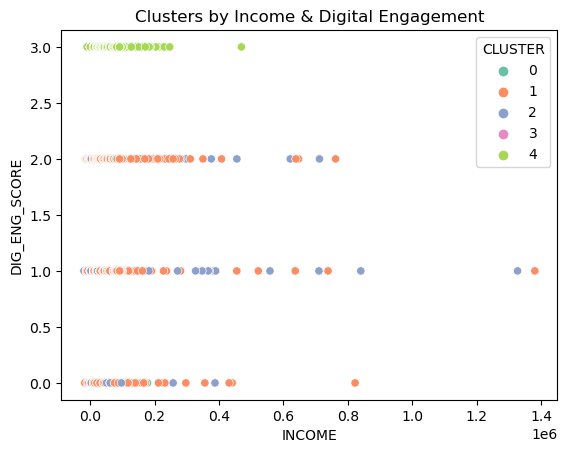

C:\Users\Tayyab\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


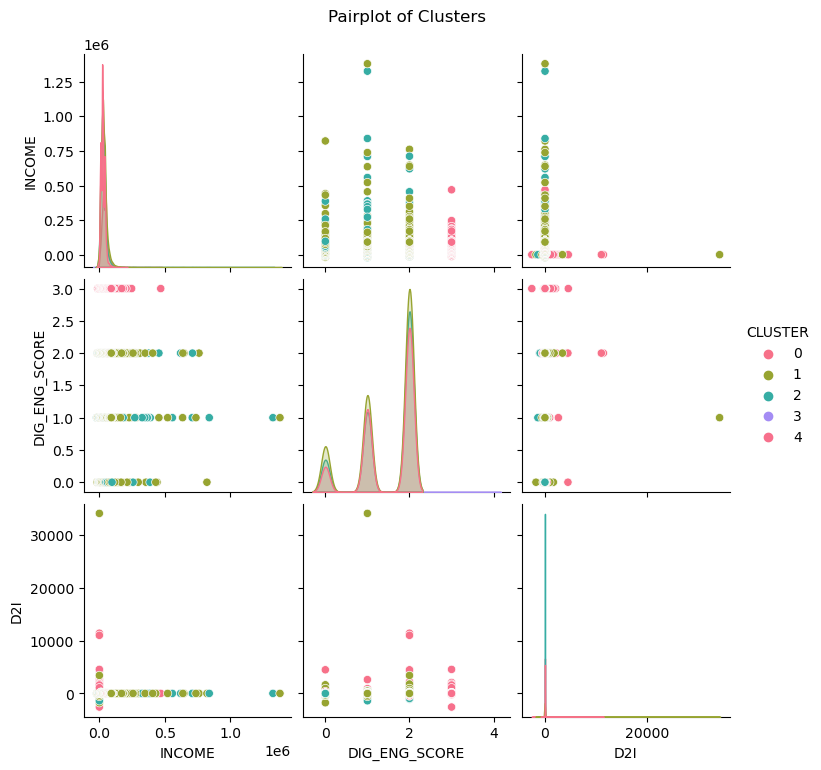

In [14]:

sns.scatterplot(data=df, x='INCOME', y='DIG_ENG_SCORE', hue='CLUSTER', palette='Set2')
plt.title('Clusters by Income & Digital Engagement')
plt.show()

# Pairplot
sns.pairplot(df, vars=['INCOME', 'DIG_ENG_SCORE', 'D2I'], hue='CLUSTER', palette='husl')
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()


# Analyzing the clusters

In [15]:
#  Analyze clusters by calculating the mean of each feature within each cluster
cluster_summary = df.groupby('CLUSTER')[features_base].mean()  
print("Cluster Summary:")
print(cluster_summary)

#  Accessing the centroids of the clusters
centroids = kmeans_base_raw.cluster_centers_  # Cluster centroids
centroids_df = pd.DataFrame(centroids, columns=features_base)  
print("\nCentroids of Clusters:")
print(centroids_df)

Cluster Summary:
               INCOME            TRB       D2I  DIG_ENG_SCORE
CLUSTER                                                      
0        25184.835566   68380.551379  6.682662       1.510273
1        33282.936290  212943.496946  8.387835       1.455206
2        29997.734387  153497.977771  5.400479       1.506415
3        39799.613253  177477.262129  4.562596       2.000000
4        38809.716618  225590.121208  8.390222       3.000000

Centroids of Clusters:
      INCOME        TRB         D2I  DIG_ENG_SCORE
0  -0.344507  -0.239663   -0.019670      -1.210492
1   1.672935   1.984702    0.049537       0.344702
2  20.968102  22.513716    0.046654      -0.622274
3  -0.055476  -0.153835   -0.006589       0.601889
4  -1.205990  -0.176720  105.788612      -0.065130


### **1) Interpret the Clusters and Describe the Characteristics of Customers in Each Group:**

- **Cluster 0 (Low Income, Moderate Engagement)**:
  - **INCOME**: 25,184 (Low income)
  - **TRB**: 68,380 (Moderate transaction activity)
  - **D2I**: 6.68 (High debt-to-income ratio)
  - **DIG_ENG_SCORE**: 1.51 (Moderate digital engagement)
  - **Real World Implication**: This group likely represents younger, low-income customers with moderate banking activity. They might be in the **Acquisition** or **Activation** phase. HSBC should target them with **affordable, entry-level products** such as **basic savings accounts** and **starter loans**, and **financial literacy programs** to increase digital engagement.

- **Cluster 1 (Higher Income, High Engagement)**:
  - **INCOME**: 33,282 (High income)
  - **TRB**: 212,943 (High transaction-related behavior)
  - **D2I**: 8.39 (High debt-to-income ratio)
  - **DIG_ENG_SCORE**: 1.46 (Moderate digital engagement)
  - **Real World Implication**: Affluent customers with high transactional behavior and high debt. Likely in **Relationship Deepening** phase. HSBC should focus on offering **premium services** like **wealth management**, **personalized financial solutions**, and tools to help them manage debt effectively.

- **Cluster 2 (Mid-Income, Moderate Engagement)**:
  - **INCOME**: 29,998 (Mid-range income)
  - **TRB**: 153,498 (Moderate transaction-related behavior)
  - **D2I**: 5.40 (Moderate debt-to-income ratio)
  - **DIG_ENG_SCORE**: 1.51 (Moderate engagement)
  - **Real World Implication**: These customers are in the **Activation** or **Relationship Deepening** phase. HSBC should offer **mobile-first services**, **digital loans**, and **financial management tools** to strengthen engagement and provide a seamless experience.

- **Cluster 3 (Higher Income, Low Debt, High Digital Engagement)**:
  - **INCOME**: 39,799 (Higher income)
  - **TRB**: 177,477 (Moderate transaction-related behavior)
  - **D2I**: 4.56 (Low debt-to-income ratio)
  - **DIG_ENG_SCORE**: 2.00 (High digital engagement)
  - **Real World Implication**: High-income individuals with low debt and high digital engagement. Likely in **Relationship Deepening** phase. HSBC can offer **advanced digital products** like **customized financial advice**, **investment management services**, and **premium banking solutions** to deepen their relationship.

- **Cluster 4 (High Income, High Debt, High Digital Engagement)**:
  - **INCOME**: 38,809 (High income)
  - **TRB**: 225,590 (High transaction-related behavior)
  - **D2I**: 8.39 (High debt-to-income ratio)
  - **DIG_ENG_SCORE**: 3.00 (Very high digital engagement)
  - **Real World Implication**: Affluent customers with high debt but significant digital engagement. HSBC should offer **wealth management**, **debt management** solutions, and **personalized digital tools** to help them manage finances and investments while utilizing their high digital engagement.


# Raw Data
## We run analysis on raw data to create comparission between feature engineered results and the results on raw data. This helps us take informed decissions and evaluate the importance of feature engineering.
### Best k = 5 for raw data aswell

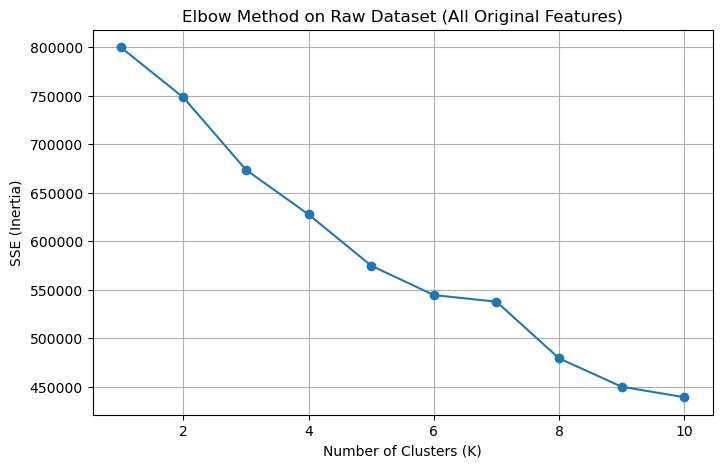

Silhouette Score (Raw Data): 0.178


In [16]:
# Load raw dataset
file_path = 'HSBC_ST138D-XLS-ENG.xlsx'
df = pd.read_excel(file_path, sheet_name='Synthetic Data')

# Select only raw columns (no feature engineering)
raw_features = ['AGE', 'INCOME', 'TRB', 'DIG_ACTIVE', 'FX_TRANS', 'PAYME', 
                'CC', 'LN', 'MT', 'TD', 'SC', 'SP', 'BD', 'MPF']

# One-hot encode AGE
df_encoded = pd.get_dummies(df[raw_features], columns=['AGE'])
df_encoded = df_encoded.fillna(0)

# Normalize the dataset
scaler = StandardScaler()
X_raw_all = scaler.fit_transform(df_encoded)

# Elbow Method to find the optimal number of clusters (K)
sse_raw = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_raw_all)
    sse_raw.append(kmeans.inertia_)

# Plot the Elbow Curve for raw data
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse_raw, marker='o')
plt.title('Elbow Method on Raw Dataset (All Original Features)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.grid(True)
plt.show()

# Fit the final KMeans model on the raw data
optimal_k = 5  
kmeans_raw = KMeans(n_clusters=optimal_k, random_state=42)
labels_raw = kmeans_raw.fit_predict(X_raw_all)

# Calculate the Silhouette Score for the raw data
sil_score_raw = silhouette_score(X_raw_all, labels_raw)
print(f"Silhouette Score (Raw Data): {sil_score_raw:.3f}")


# TOP DOWN APPROACH
## In this we are going to create clusters / segments using income , age (demographic factors) and geographical factors relating to local or international (PayMe corresponds to local while Fx Trans to international)


In [17]:
# Load the dataset
file_path = 'HSBC_ST138D-XLS-ENG.xlsx'
df = pd.read_excel(file_path, sheet_name='Synthetic Data')


In [18]:
# One-hot encoding AGE
df = pd.get_dummies(df, columns=['AGE'], prefix='AGE')
age_columns = [col for col in df.columns if col.startswith('AGE_')]
df[age_columns] = df[age_columns].astype(int)

# binning income to categories
df['Income_Category'] = pd.cut(df['INCOME'], bins=[-float('inf'), 0, 20000, 50000, 1000000], labels=["Very Low", "Low", "Medium", "High"])

# Define geographic engagement based on PayMe (Hong Kong) and FX Transactions (International)
df['Geographic'] = df.apply(lambda x: 'HK' if x['PAYME'] == 1 or x['FX_TRANS'] == 0 else 'International', axis=1)

# Convert AGE_18-24, AGE_25-29, and AGE_30-34 to strings for concatenation
df['Customer_Segment'] = df['AGE_18-24'].map({1: 'Young'}).fillna('') + \
                         df['AGE_25-29'].map({1: 'YoungProfessional'}).fillna('') + \
                         df['AGE_30-34'].map({1: 'MidCareer'}).fillna('') + \
                         '_' + df['Income_Category'].astype(str) + \
                         '_' + df['Geographic'].astype(str)

# Display the first few rows to verify
print(df[['Customer_Segment', 'INCOME', 'PAYME', 'FX_TRANS']].head())

# Group by the predefined segment and calculate the mean of relevant features
segment_summary = df.groupby('Customer_Segment')[['INCOME', 'TRB']].mean()

# Output the summary
print("\nSegment Summary:")
print(segment_summary)


              Customer_Segment        INCOME  PAYME  FX_TRANS
0             MidCareer_Low_HK   9012.126323      1         0
1          MidCareer_Medium_HK  44108.030639      0         0
2  YoungProfessional_Medium_HK  45782.412638      0         0
3          MidCareer_Medium_HK  26525.406385      0         0
4          MidCareer_Medium_HK  20671.511249      1         0

Segment Summary:
                                                INCOME           TRB
Customer_Segment                                                    
MidCareer_High_HK                         7.439290e+04  6.658139e+05
MidCareer_High_International              7.598961e+04  6.268145e+05
MidCareer_Low_HK                          1.090852e+04  8.901066e+04
MidCareer_Low_International               1.445547e+04  7.162453e+04
MidCareer_Medium_HK                       3.268956e+04  1.581273e+05
MidCareer_Medium_International            3.461011e+04  1.312740e+05
MidCareer_Very Low_HK                    -5.813172e+03  4.

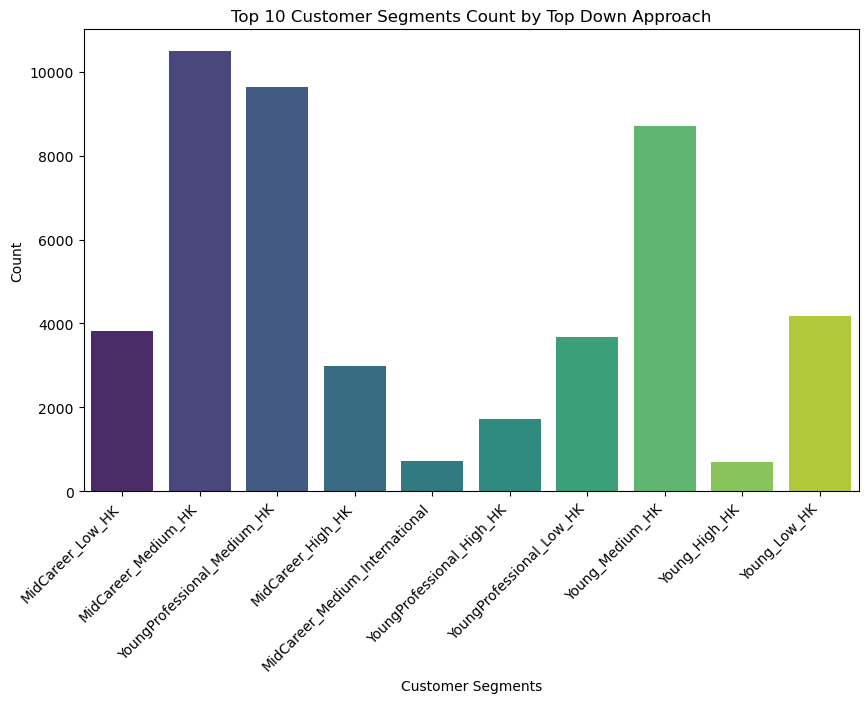

In [19]:
# Get the top 10 most common segments by counting occurrences
top_segments = df['Customer_Segment'].value_counts().nlargest(10).index

# Filter the dataframe to only include the top 10 segments
df_top_segments = df[df['Customer_Segment'].isin(top_segments)]

# Create a count plot for the top 10 customer segments
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_segments, x='Customer_Segment', palette='viridis')
plt.title('Top 10 Customer Segments Count by Top Down Approach')
plt.xlabel('Customer Segments')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability



# Show the plot
plt.show()


### The top down approach to segmentation creates general segments that highlight what age group the customer belongs to , their income status and whether they are involved in HongKong based transactions or International transactions. This method provides more general clusters than bottom up where we had personal characteristics of each customer being considered.

# Conclusion
## To conclude in this assignment we can see that feature engineering is extremely important and by engineering the right features we were able to improve the clustering and get a boost to silhouette scores. The top down approach is very general unlike bottom up and this explains why bottom up segmentation is more popular since we can identify customer characteristics much better.